# Part II -  FordGoBike Sharing System Analysis
## by  Umar Muhammed Abubakar

## Investigation Overview

In this exploratory analysis, my project is going to be based on exploring key features of the FordGoBike trips dataset,
The main features I am going to focus on are: start_day_of_week, start_hour_of_day, trip_duration, user_type, days of the week and member_gender.

We are going to use these features to answer the following question:
 Which hour of the day and week have the highest number of trips
- what is the percentage of FordGoBike users based on gender
- Which user type uses the FordGoBike most?
- What is the average Trip Duration during the week?

## Dataset Overview
Like other bike share services, Ford GoBike uses a fleet of sturdy, durable bikes that are locked into a system of docking stations spread across the city of San francisco. The bikes are perfect for one-way travels because they may be unlocked from one station and returned to any other station in the network. The bike share program is used by people for a variety of purposes, including getting to and from work, school, and doing errands. It is a fun, efficient, and inexpensive mode of transportation.
This dataset has 183,412 observations across 16 variables, including ride duration (Secs), start and end times, start and end station longitudes and latitudes, bike ids, user types, member birth year, member genders, start and end station names, and bike share for all trips

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and perform some data type cleaning
df_fordgobike_trips = pd.read_csv('201902-fordgobike-tripdata.csv')
# fixing start_time end_time to datetime data type
df_fordgobike_trips['start_time'] = pd.to_datetime(df_fordgobike_trips.start_time)
df_fordgobike_trips['end_time'] = pd.to_datetime(df_fordgobike_trips.end_time)
# fixing start_station_id, end_station_id and bike_id to object data type
df_fordgobike_trips['start_station_id'] = df_fordgobike_trips['start_station_id'].astype('str')
df_fordgobike_trips['end_station_id'] = df_fordgobike_trips['end_station_id'].astype('str')
df_fordgobike_trips['bike_id'] = df_fordgobike_trips['bike_id'].astype('str')
# fixing user_type and member_gender to category data type
df_fordgobike_trips['user_type'] = df_fordgobike_trips['user_type'].astype('category')
df_fordgobike_trips['member_gender'] = df_fordgobike_trips['member_gender'].astype('category')

In [3]:
# add new columns for start month, day of the week, and hour of the day and convert duration_sec to duration in minutes
df_fordgobike_trips['trip_duration'] = df_fordgobike_trips['duration_sec']/60
df_fordgobike_trips['start_date'] = df_fordgobike_trips.start_time.dt.strftime('%Y-%m-%d')
df_fordgobike_trips['start_hour_of_day'] = df_fordgobike_trips.start_time.dt.strftime('%H')
df_fordgobike_trips['start_day_of_week'] = df_fordgobike_trips.start_time.dt.strftime('%A')
df_fordgobike_trips['start_month'] = df_fordgobike_trips.end_time.dt.strftime('%B')

df_fordgobike_trips.head(1000)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration,start_date,start_hour_of_day,start_day_of_week,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,March
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,866,2019-02-28 19:48:35.057,2019-02-28 20:03:01.335,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,74.0,Laguna St at Hayes St,37.776435,...,5525,Subscriber,NaN,NaN,No,14.433333,2019-02-28,19,Thursday,February
996,405,2019-02-28 19:56:14.701,2019-02-28 20:03:00.644,171.0,Rockridge BART Station,37.844279,-122.251900,211.0,Broadway at 40th St,37.827757,...,5690,Subscriber,1977.0,Female,Yes,6.750000,2019-02-28,19,Thursday,February
997,981,2019-02-28 19:46:31.555,2019-02-28 20:02:53.549,321.0,5th St at Folsom,37.780146,-122.403071,125.0,20th St at Bryant St,37.759200,...,6206,Subscriber,1996.0,Female,No,16.350000,2019-02-28,19,Thursday,February
998,163,2019-02-28 20:00:06.879,2019-02-28 20:02:49.984,190.0,West St at 40th St,37.830223,-122.270950,315.0,Market St at 45th St,37.834174,...,2142,Subscriber,1984.0,Male,No,2.716667,2019-02-28,20,Thursday,February


## Which hour of the day and week have the highest number of trips
There are some hours of the day with highest peak patronage by users of the FordGoBike system. Many trips are concentrated between 7am to 9am in the morning and 4pm to 6pm in the evening with Thursday having the highest number of trips. This is an evidence that most of the FordGoBike users rent the bike for going and coming back from work. This may lead to traffic situation around the stations because of the rush hour of the day.

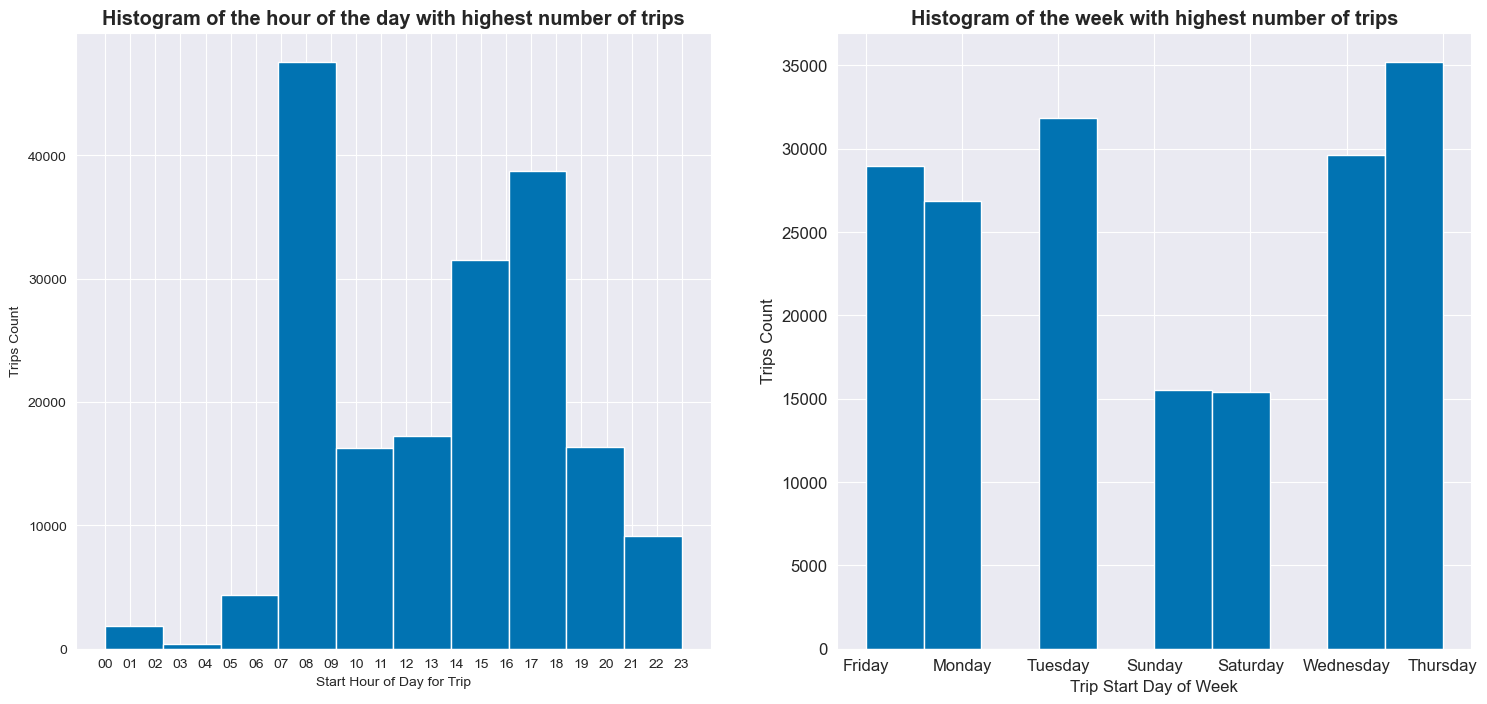

In [4]:
# Hour of the day with highest number of trips
plt.figure(figsize=[18, 8]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');
plt.subplot(1, 2, 1);
df_fordgobike_trips.sort_values('start_hour_of_day', inplace=True)
plt.hist(data=df_fordgobike_trips, x='start_hour_of_day', color=base_color);
plt.rc('font', size=12) 
plt.rc('figure', titlesize=5) 
plt.xlabel('Start Hour of Day for Trip');
plt.ylabel('Trips Count');
plt.title("Histogram of the hour of the day with highest number of trips", fontweight='bold');

# trip distribution in a week                            
plt.subplot(1, 2, 2);
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_category = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
df_fordgobike_trips['start_day_of_week'] = df_fordgobike_trips['start_day_of_week'].astype(days_category)
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.hist(data=df_fordgobike_trips, x='start_day_of_week', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Trips Count');
plt.rc('font', size=12) 
plt.rc('figure', titlesize=12)
plt.title("Histogram of the week with highest number of trips", fontweight='bold');

## what is the percentage of FordGoBike users based on gender
Male gender have the highest number of FordGoBike users compared with the remaining genders. 74.60% of FordGoBike users are Males while 23.32% are females and other genders have 2.09%.

In [5]:
# define a barh function for FordGoBike data visualization
def barplot(column, title=None, xlabel=None, ylabel=None, figsize=(12,6)):
    sb.set_style('darkgrid')
    # plot the data on a barplot chart
    colors = ['green', 'blue', 'red']
    plt.subplot(1, 2, 1);
    column.plot(kind='barh', color=colors, figsize=figsize);
    plt.title(title, fontsize = 18,fontweight='bold');
    
    plt.xlabel(xlabel, labelpad=15)
    plt.ylabel(ylabel, labelpad=15);
    plt.xlim(0,100)
    plt.yticks(fontsize = 11)
    plt.show()

In [6]:
# Get the percentage of gender
gender_trips = df_fordgobike_trips.groupby('member_gender').agg({'bike_id':'count'})
gender_trips['perc'] = (gender_trips['bike_id']/gender_trips['bike_id'].sum())*100

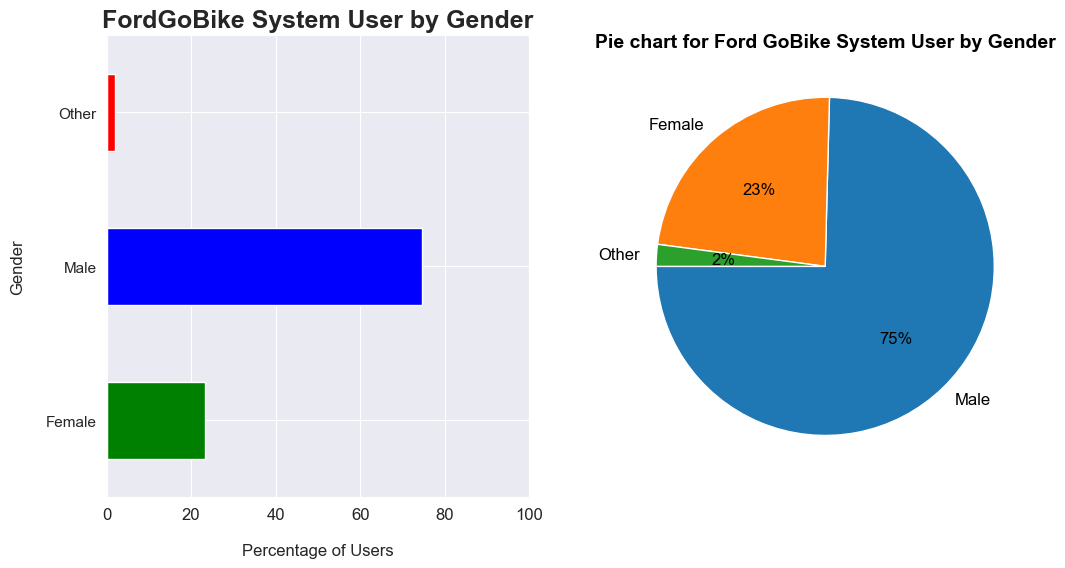

In [7]:
# Pie chart plot of percentage of FordGoBike users based on gender
plt.subplot(1, 2, 2);
users_gender = df_fordgobike_trips['member_gender'].value_counts()
plt.pie(users_gender, labels = users_gender.index, autopct= '%1.0f%%', shadow=False, textprops={'color':'black'}, counterclock = True, startangle = 180);
plt.title('Pie chart for Ford GoBike System User by Gender', fontweight='bold', fontsize=14, color = 'black');

 # calling the barplot function to visualize our FordGoBike System User by Gender
barplot(gender_trips['perc'], 'FordGoBike System User by Gender' , 'Percentage of Users', 'Gender')


## Which user type uses the FordGoBike most?
The usage of FordGoBike sharing system is contributed mostly by Subscriber user type with a usage of 90.50% while regular customers have just 9.50%, this implies that most of the users have monthly or week membership subcription to use the FordGoBike system while Customer user type are casual users such as tourish etc who rent the bikes once in a while.

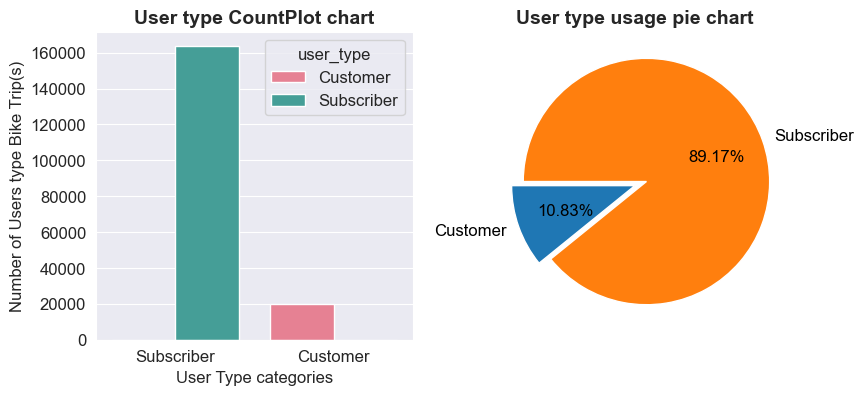

In [8]:
# Get the number of Customers and Subscribers
customer_utype = df_fordgobike_trips.query('user_type == "Customer"')['bike_id'].count()
subscriber_utype = df_fordgobike_trips.query('user_type == "Subscriber"')['bike_id'].count()
customer_dist = customer_utype / df_fordgobike_trips['bike_id'].count()
subscriber_dist = subscriber_utype / df_fordgobike_trips['bike_id'].count()

# countplot chart of users type
plt.figure(figsize = [9, 4]);
palette= sb.color_palette("husl", 2);
plt.subplot(1, 2, 1);
sb.countplot(data = df_fordgobike_trips, x = "user_type", order = df_fordgobike_trips.user_type.value_counts().index,  hue="user_type", palette=palette);
plt.xlabel('User Type categories');
plt.ylabel('Number of Users type Bike Trip(s)');
plt.title('User type CountPlot chart', fontweight='bold', fontsize=14);

# Pie chart of users type
fig_size = [customer_dist, subscriber_dist];
explode = (0, 0.1);
utype_label = ['Customer', 'Subscriber'];
plt.subplot(1, 2, 2);
plt.pie(fig_size, explode=explode, autopct='%1.2f%%', labels = utype_label, textprops={'color':'black'}, counterclock = True, shadow=False, startangle=180);
plt.title('User type usage pie chart', fontsize=14, fontweight='bold');


## What is the average Trip Duration during the week?
The average duration for riding bike is smalller during the normal working days(i.e Monday to Friday) as opposed to weekend where we have higher trips duration. FordGoBike users have an average daily trip during of about 11 Minutes to 15 minutes. 

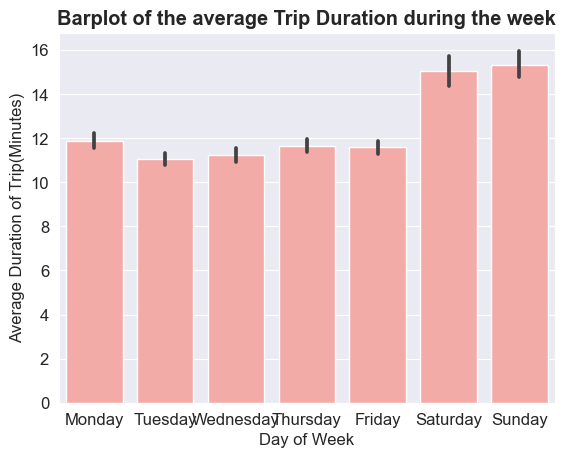

In [9]:
base_color = sb.color_palette("pastel")[3]
sb.barplot(data=df_fordgobike_trips, x='start_day_of_week', y='trip_duration', color=base_color);
plt.rc('font', size=12) 
plt.rc('figure', titlesize=12)
plt.xlabel('Day of Week',  fontsize=12);
plt.ylabel('Average Duration of Trip(Minutes)',  fontsize=12);
plt.title("Barplot of the average Trip Duration during the week", fontweight='bold');

In [11]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 845154 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\N-POWER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\N-POWER\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\N-POWER\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\N-POWER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "C:\Users\N-POWER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filen